In [79]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import sys
sys.path.append("../")

from src import cleaner

# For choropleth plots
from urllib.request import urlopen
import json
from pycountry import countries as pcout


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
# Load data and clean
data = pd.read_csv('../data/cleaned_data.csv')
data2 = pd.read_json('../data/data.json')

In [87]:
test_df = data2.dropna()

In [102]:
test_df = test_df[(test_df['country'] != '') & (test_df['country'] != 'A1')]
(test_df['country'] == 'A1').sum()

0

In [105]:
country_codes = test_df['country'].values
#test_df['country'].apply(lambda x: pcout.get(alpha_2=x).alpha_3)

In [82]:
pcout.get(alpha_2='US').alpha_3

'USA'

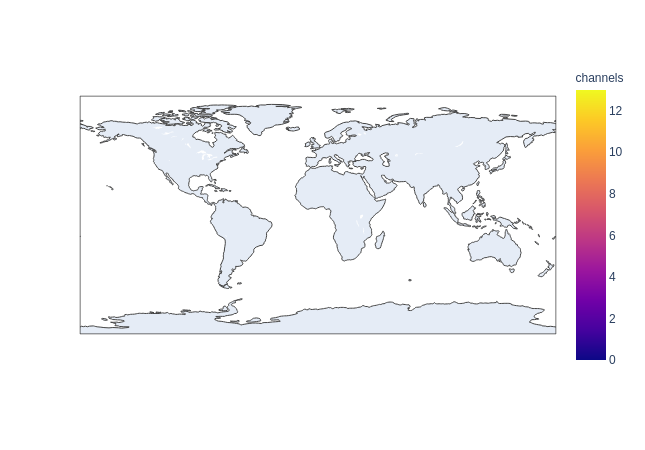

In [76]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(test_df, locations="country",
                    color="channels", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [50]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [16]:
# Get fraud statistics
n_fraud = (cleaned_data['fraud']==1).sum()
frac_fraud = n_fraud/cleaned_data.shape[0]
n_fraud, frac_fraud

(1964, 0.13698821231777916)

In [33]:
# Where is max fraud?
max_fraud_index = np.argsort(cleaned_data.groupby('country')['fraud'].sum().values)[::-1]
#cleaned_data.groupby('country')['fraud'].sum().index[66]

array([66, 25, 10,  0, 42, 70,  1, 52,  5, 18, 49, 51, 30, 12, 29, 48, 17,
       20, 11, 46, 53, 24,  3, 40,  8, 26, 61, 44, 57, 65, 23, 45,  7, 38,
       14, 13, 59, 22, 15, 19, 69, 28, 54, 32, 34, 37, 58,  6, 56, 55, 62,
        4,  2,  9, 16, 71, 21, 27, 31, 33, 36, 39, 41, 43, 47, 50, 60, 63,
       64, 67, 68, 35])

In [35]:
cleaned_data['country'].unique()

array(['US', 'IE', 'FR', 'CA', 'GB', '', 'AU', 'ES', 'NL', 'DE', 'VN',
       'MY', 'NZ', 'PK', 'MA', 'AR', 'MX', 'CH', None, 'SG', 'TH', 'BE',
       'PH', 'A1', 'CI', 'AT', 'ID', 'PS', 'PT', 'TR', 'NI', 'KE', 'IT',
       'HU', 'RS', 'RO', 'NG', 'CZ', 'PR', 'AE', 'BS', 'KH', 'JM', 'IN',
       'NA', 'FI', 'HR', 'BG', 'VI', 'TJ', 'GH', 'PE', 'QA', 'SI', 'GR',
       'BB', 'CM', 'IS', 'SE', 'RU', 'DZ', 'VE', 'UY', 'ZA', 'IM', 'LB',
       'CR', 'IL', 'CN', 'DK', 'CO', 'EC', 'JE'], dtype=object)

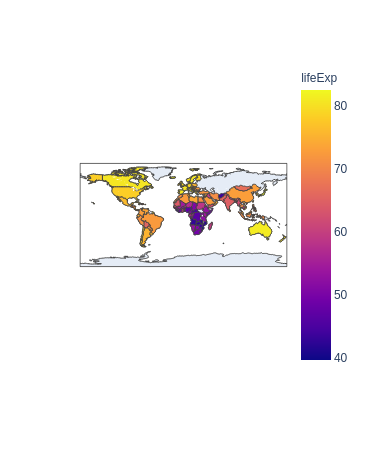

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
